In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
XXX = pd.read_csv("tmp_hms_sav_ass.csv", sep=';')
XXX

,id,idResource,idProject,refType,refId,rate,assignedWork,realWork,leftWork,plannedWork,...,plannedEndDate,idRole,dailyCost,newDailyCost,assignedCost,realCost,leftCost,plannedCost,billedWork,notPlannedWork
0,1,5,1,Activity,1,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
1,4,15,4,Activity,4,100,NaN,131.00,0.0,131.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
2,6,15,4,Activity,6,100,NaN,21.00,0.0,21.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
3,8,15,4,Activity,9,100,NaN,4.00,0.0,4.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
4,9,15,4,Activity,10,100,NaN,2.00,0.0,2.00,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7601,9,34,Activity,594,100,NaN,0.00,0.0,0.00,...,NaN,4.0,873.0,873.0,0.0,0.00,0.0,0.00,0.0,0.0
7197,7602,32,34,Activity,594,100,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7198,7603,9,34,Activity,597,100,NaN,0.25,0.0,0.25,...,NaN,4.0,873.0,873.0,0.0,218.25,0.0,218.25,0.0,0.0
7199,7604,7,12,Activity,1524,100,NaN,0.50,0.0,0.50,...,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.00,0.0,0.0


In [3]:
XX =  XXX[['idResource','idProject','realCost','realWork']]
dataset = XX.replace(np.nan,0)
dataset = XX.replace(np.nan,0)

dataset['realWork'] =  dataset['realWork'].astype(int)
dataset['realCost'] =  dataset['realCost'].astype(int)

dataset = dataset.drop(dataset[dataset.realCost == 0].index)


dataset

,idResource,idProject,realCost,realWork
1408,9,14,218,0
1496,12,34,436,15
1799,9,34,9821,11
1800,9,34,2837,3
1801,9,34,873,1
1802,9,34,436,0
1803,9,34,873,1
1805,9,34,436,0
1806,9,34,873,1
1807,9,34,218,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1408 to 7198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   idResource  30 non-null     int64
 1   idProject   30 non-null     int64
 2   realCost    30 non-null     int32
 3   realWork    30 non-null     int32
dtypes: int32(2), int64(2)
memory usage: 960.0 bytes


In [5]:
dataset.describe()

,idResource,idProject,realCost,realWork
count,30.000000,30.000000,30.000000,30.000000
mean,9.100000,32.766667,1178.300000,1.600000
std,0.547723,4.710102,1777.352994,3.265282
min,9.000000,14.000000,218.000000,0.000000
25%,9.000000,34.000000,436.000000,0.000000
50%,9.000000,34.000000,873.000000,1.000000
75%,9.000000,34.000000,1091.000000,1.000000
max,12.000000,34.000000,9821.000000,15.000000


In [6]:
dataset.columns

Index(['idResource', 'idProject', 'realCost', 'realWork'], dtype='object')

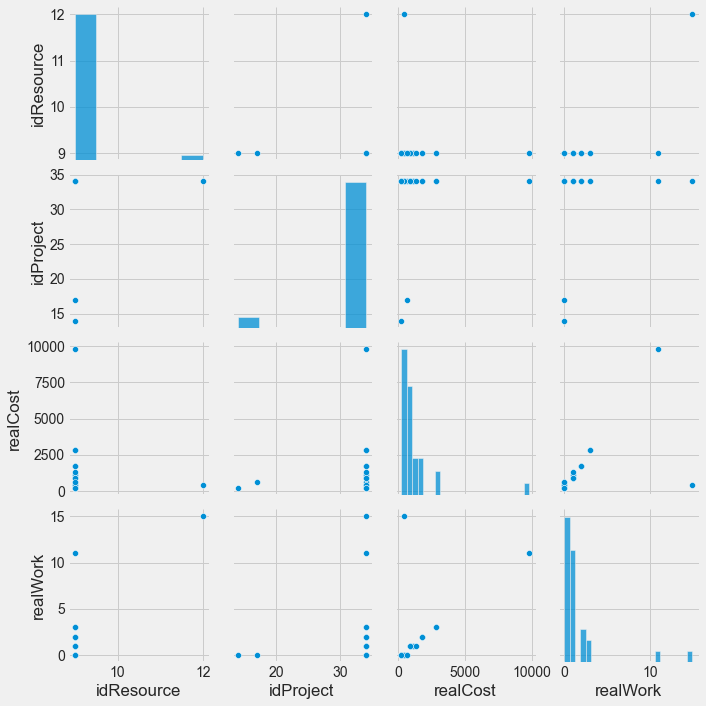

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset[['idResource','idProject','realCost']]
y = dataset['realWork']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [10]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
s = lin_reg.fit(X_train,y_train)

In [13]:
# print the intercept
print(lin_reg.intercept_)

1.7916666666666667


In [14]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
idResource,2.949041
idProject,-0.001923
realCost,2.235893


In [15]:
pred = lin_reg.predict(X_test)

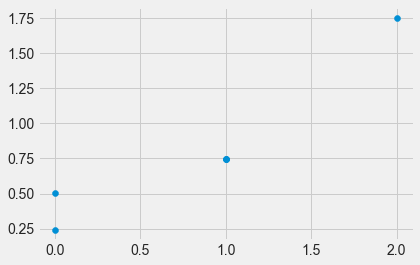

In [16]:
plt.scatter(y_test, pred)

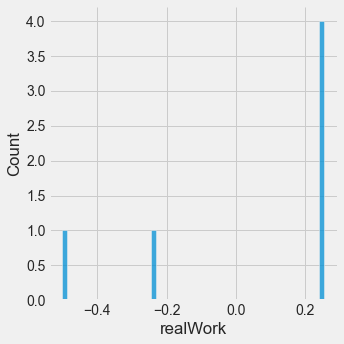

In [17]:
sns.displot((y_test - pred), bins=50);

In [18]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.29180540732884114
MSE: 0.09398648616326465
RMSE: 0.3065721549052762
R2 Square 0.8009697940072042
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.13072618495093632
MSE: 0.036099232413305746
RMSE: 0.18999798002427748
R2 Square 0.9971307909659081
__________________________________


In [19]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.291805,0.093986,0.306572,0.80097,0.475063


In [20]:
pre = lin_reg.score(X_test, y_test)
pre

0.8009697940072042